## ATom

We compare the model month which is mostly covered by the campaign to the data:

ATom 1: 2016-07-29 to 2016-08-23  --> AUG

ATom 2: 2017-01-26 to 2017-02-21  --> FEB

ATom 3: 2017-09-28 to 2017-10-28  --> OCT

ATom 4: 2018-04-24 to 2018-05-21  --> MAY  

We use all years (2008--2014).
### Averaging:
To make as fair a comparison as possible, we first categorize which gridbox in the model each measurement would fall within. Then we average over each the values in each grid box so that we get a gridded observational dataset on the same grid as the model. We then mask the model output to match the observational coverage and produce means on these now similar datasets. 

Note that the resolution of the model output is monthly mean files, and thus the time dimension is only considered in the selection of the relevant time of year (selecting the closest month). 

### Altitude to pressure coordinate:
The observational data is given in height above sea level. In order to compare this to the modelling data in pressure coordinates, we calculate the pressure of each observation by approximating from the Hypsometric equation: 


$p = P_0 \exp(\frac{Mg}{RT}h)$

at standard atmospheric conditions:
M = 0.02896,
P0 = 1013.25,
R = 8.3143,
g = 9.807,
T = 288.15.

This gives some error due to not taking temperature variations into account, but these are small compared to the grid size.

In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore', )

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [6]:
from useful_scit.imps import *

In [5]:
from oas_erf.constants import project_base_path, project_name
from pathlib import Path

In [2]:
M = 0.02896
P0 = 1013.25
R = 8.3143
g = 9.807
T = 288.15

def height2pres(h):    
    p = P0*np.exp(-M*g/(R*T)*h)
    return p

In [3]:
atom2month= dict(
    atom1=8,
    atom2=2,
    atom3=10,
    atom4=5
)

In [4]:
from oas_erf.util.plot import plot_profiles

from oas_erf.util.naming_conventions import var_info

from oas_erf.util.imports import get_averaged_fields

from IPython import get_ipython
from useful_scit.imps import (plt)
from matplotlib.lines import Line2D
import seaborn as sns

from oas_erf.data_info.simulation_types import get_diff_by_type, get_casen_by_type_mod
from oas_erf.util.imports import get_averaged_fields
from oas_erf.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr
from oas_erf.util.plot.colors import get_case_col
from oas_erf.util.plot.plot_maps import plot_map_diff, plot_map

from oas_erf.constants import get_plotpath, path_data_info
from oas_erf.util.practical_functions import make_folders
import cartopy.crs as ccrs
from matplotlib import gridspec
from matplotlib import colors

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/OAS-ERF/oas_erf/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download data:

Download data from https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1581 and place in data folder:


In [13]:
base_dir = Path(project_base_path+project_name)

print(base_dir/'data'/'ATom_merge_1581')

/home/ubuntu/mnts/nird/projects/OAS-ERF/data/ATom_merge_1581


In [5]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev

In [6]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'

## Cases

In [ ]:
cases_sec = [
    'SECTv21_ctrl_koagD',

]
cases_orig = [
    'noSECTv21_default_dd',
    'noSECTv21_ox_ricc_dd',
    ]

cases_pd = cases_orig + cases_sec

In [ ]:
cases_sec_pi = [

]
cases_orig_pi = [
]

cases_pi = cases_orig_pi + cases_sec_pi

In [9]:
cases = cases_pd + cases_pi

In [10]:
from pathlib import Path

In [11]:
version = 'pi_pd_prof_aircraft/'
plot_path = get_plotpath('prof')
filen_base = Path(plot_path + '/%s' % version)
filen_base.mkdir(exist_ok=True)
# print(plot_path)
make_folders(plot_path)

In [12]:
filen_base

PosixPath('/home/ubuntu/mnts/nird/projects/Plots_SECT_SENS/prof/pi_pd_prof_aircraft')

In [ ]:
from oas_erf.util.slice_average.avg_pkg import yearly_mean_dic

In [14]:
varl = ['NCONC01','N50','N60','T','lat_wg']#,'N60-500']#,'Z3']#,'N60']

In [15]:
cases

['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD']

In [16]:
dic = yearly_mean_dic(varl,
                    cases,
                    startyear,
                    endyear,
                    pmin,
                    pressure_adjust,
                    model='NorESM',
                    avg_over_lev=False,
                    groupby='time.month',
                    dims=['time'],
                    area='Global'
                    )

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
averaging case noSECTv21_default_dd:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
averaging case noSECTv21_default_dd:
['N50']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
averaging case noSECTv21_default_dd:
['N60']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/noSECTv21_default_dd/constants.nc
found contants file /home/ubuntu/mnts/nird/pr

In [ ]:
from oas_erf.util.imports.get_pressure_coord_fields import get_pressure_coord_fields

In [18]:
dic_full={}
for case in cases:
    input_ds = get_pressure_coord_fields(case,
                                     varl,
                                     startyear,
                                     endyear,
                                     '.h0.',
                                     'NorESM')
    dic_full[case] = input_ds

In [21]:
base_dir = Path(project_base_path+project_name)

In [22]:
path_data = base_dir /'data/ATom_merge_1581/data'
path_data.exists()

True

In [23]:
lat = 'G_LAT'
lon = 'G_LONG'
alt = 'G_ALT'
prs = 'G_PRES'

pressure = 'P'
import pandas as pd
import numpy as np


Using MER10 which is mean over 10 sec intervals. 

In [24]:
dic_path_atom_dt = dict()

for i in range(1,5):
    k =f'MER10_DC8_ATom-{i}.nc'
    dic_path_atom_dt[f'atom{i}'] = path_data/ k

Accumulation mode: above 60 nm

In [25]:
nnucl = 'N_nucl_AMP'
nacc = 'N_accum_AMP'

ncoar = 'N_coarse_AMP'

In [26]:
fn = path_data /'MER10_DC8_ATom-1.nc'

In [27]:
ds = xr.open_dataset(fn, group='NAerosol')#, combine='by_coords',concet_dim='time')
ds

<xarray.Dataset>
Dimensions:             (time: 32899)
Dimensions without coordinates: time
Data variables:
    N_nucl_AMP          (time) float64 ...
    S_nucl_AMP          (time) float64 ...
    V_nucl_AMP          (time) float64 ...
    N_aitken_AMP        (time) float64 ...
    S_aitken_AMP        (time) float64 ...
    V_aitken_AMP        (time) float64 ...
    N_accum_AMP         (time) float64 ...
    S_accum_AMP         (time) float64 ...
    V_accum_AMP         (time) float64 ...
    N_coarse_AMP        (time) float64 ...
    S_coarse_AMP        (time) float64 ...
    V_coarse_AMP        (time) float64 ...
    N_fine_AMP          (time) float64 ...
    S_fine_AMP          (time) float64 ...
    V_fine_AMP          (time) float64 ...
    calc_ext_340_AMP    (time) float64 ...
    calc_ext_380_AMP    (time) float64 ...
    calc_ext_405_AMP    (time) float64 ...
    calc_ext_440_AMP    (time) float64 ...
    calc_ext_500_AMP    (time) float64 ...
    calc_ext_532_AMP    (time) float64 ...
    calc_ext_664_AMP    (time) float64 ...
    calc_ext_675_AMP    (time) float64 ...
    calc_ext_870_AMP    (time) float64 ...
    calc_ext_937_AMP    (time) float64 ...
    calc_ext_1020_AMP   (time) float64 ...
    calc_ext_1064_AMP   (time) float64 ...
    calc_ext_1640_AMP   (time) float64 ...
    asymmetry_340_AMP   (time) float64 ...
    asymmetry_380_AMP   (time) float64 ...
    asymmetry_405_AMP   (time) float64 ...
    asymmetry_440_AMP   (time) float64 ...
    asymmetry_500_AMP   (time) float64 ...
    asymmetry_532_AMP   (time) float64 ...
    asymmetry_664_AMP   (time) float64 ...
    asymmetry_675_AMP   (time) float64 ...
    asymmetry_870_AMP   (time) float64 ...
    asymmetry_937_AMP   (time) float64 ...
    asymmetry_1020_AMP  (time) float64 ...
    asymmetry_1064_AMP  (time) float64 ...
    asymmetry_1640_AMP  (time) float64 ...
Attributes:
    PI_name:          Charles Brock, Christina Williamson, Agnieszka Kupc, Ka...
    PI_organization:  NOAA ESRL Chemical Sciences Division
    description:      Aerosol sizing instruments: 5-chan CPC (N-MASS), ultra-...
    PI_contact_info:  Address: NOAA ESRL Chemical Sciences Division,  R/CSD2,...
    instrument_info:  N/A
    data_info:        Number, surface, and volume concentrations of dry aeros...
    uncertainty:      Varies with size distribution--see PI. For 60s averages...
    ulod_flag:        -7777
    ulod_value:       N/A
    llod_flag:        -8888
    llod_value:       N/A
    DM_contact_info:  Data Manager:Katja Drdla; email:Katja.Drdla@nasa.gov
    other_comments:   None
    revision:         R3; R1: Final Data; R2: Corrected processing error in e...

In [28]:
ds_info = xr.open_dataset(fn, group='MMS')
ds_info

<xarray.Dataset>
Dimensions:  (time: 32899)
Dimensions without coordinates: time
Data variables:
    P        (time) float64 ...
    T        (time) float64 ...
    TAS      (time) float64 ...
    U        (time) float64 ...
    V        (time) float64 ...
    W        (time) float64 ...
    TEDR     (time) float64 ...
    REYN     (time) float64 ...
    G_LAT    (time) float64 ...
    G_LONG   (time) float64 ...
    G_ALT    (time) float64 ...
    POT      (time) float64 ...
    ROLL     (time) float64 ...
    HDG      (time) float64 ...
    PITCH    (time) float64 ...
    YAW      (time) float64 ...
    AOA      (time) float64 ...
Attributes:
    PI_name:          Bui, T. Paul
    PI_organization:  NASA Ames Research Center
    description:      MMS - Meteorological Measurement System
    PI_contact_info:  NASA Ames Research Center, MS 245-5, Moffett Field, CA,...
    instrument_info:  See https://earthscience.arc.nasa.gov/mms
    data_info:        n/a
    uncertainty:      The RMS accuracy of P and T are +/- 0.3 hPa and +/- 0.3...
    ulod_flag:        -77777777
    ulod_value:       n/a
    llod_flag:        -88888888
    llod_value:       n/a
    DM_contact_info:  Jon Dean-Day, Bay Area Environmental Research Institute...
    other_comments:    c:\atom\rawcv\d_160712.cvb
    revision:         R1; R1: REVISED DATA
    special_comment:  20160726: Horizontal winds have degraded accuracy after...

In [29]:
def open_file_ATom(fn, varl, _ds):
    #ds = xr.open_dataset(fn)#, group='NAerosol')

    ds = xr.open_dataset(fn, group='NAerosol')#, combine='by_coords',concet_dim='time')

    ds_info = xr.open_dataset(fn, group='MMS')


    ds_t = xr.open_dataset(fn)

    da_time = ds_t['time']


    ds_info_sub = ds_info[[lat,lon,alt,pressure]]

    ds_info_sub = ds_info_sub.assign_coords(coords={'time':da_time})
    for va in varl:
        ds_info_sub[va] = ds[va]

    ds_info_sub



    df = ds_info_sub.to_dataframe()
    

    h= df['G_ALT']
    #  p=1013.25e^{-h/8431m}hPa}
    p = df[pressure]
    df['G_PRES'] =p
    #diff = _ds['lev'].isel(lev=slice(1)-_ds['lon'].isel(lon=0)
    df['pres_cat'] =pd.cut(df['G_PRES'],_ds['ilev'],labels=_ds['lev'])

    #df['lat_cat'] =pd.cut(df[lat],np.arange(-90,90.5,5), labels=np.arange(-90,90,5))

    diff = _ds['lon'].isel(lon=1)-_ds['lon'].isel(lon=0)
    _ds['slon'] = [-180] + list(_ds['lon']+diff/2) 


    diff = _ds['lat'].isel(lat=1)-_ds['lat'].isel(lat=0)

    _ds['slat'] = [-90-diff/2] + list(_ds['lat']+diff/2)

    df['lat_cat'] =pd.cut(df[lat],_ds.slat, labels=_ds.lat)

    df['lon_cat'] =pd.cut(df[lon],_ds.slon, labels=_ds.lon)

    df['alt_cat'] =pd.cut(df[alt],np.arange(0,12001,400),labels=np.arange(0,12000,400))

    ds_test = df.groupby(['lat_cat','lon_cat','pres_cat']).mean().to_xarray()
    ds_count = df.groupby(['lat_cat','lon_cat','pres_cat']).count().to_xarray()
    ds_test['obs_per_gridbox'] = ds_count[varl[0]]

    return ds_test, ds_info_sub

In [30]:
dic_ds_atom_info =dict()
dic_ds_atom =dict()

for k in dic_path_atom_dt.keys():
    fn = dic_path_atom_dt[k]
    ds_test,ds_info_sub = open_file_ATom(fn, [nnucl, nacc, ncoar], dic[cases[0]])
    ds_test['N60'] = ds_test[nacc]+ds_test[ncoar]
    dic_ds_atom[k] = ds_test
    dic_ds_atom_info[k] = ds_info_sub

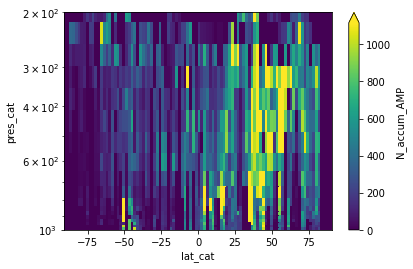

In [31]:
ds_test['N_accum_AMP'].sum(['lon_cat']).plot(y='pres_cat', yscale='log', ylim=[1000,200], robust=True)

In [32]:
import numpy as np

In [33]:
ds_test

<xarray.Dataset>
Dimensions:          (lat_cat: 96, lon_cat: 144, pres_cat: 32)
Coordinates:
  * lat_cat          (lat_cat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon_cat          (lon_cat) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * pres_cat         (pres_cat) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
Data variables:
    G_LAT            (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    G_LONG           (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    G_ALT            (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    P                (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    N_nucl_AMP       (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    N_accum_AMP      (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    N_coarse_AMP     (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    G_PRES           (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    obs_per_gridbox  (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan
    N60              (lat_cat, lon_cat, pres_cat) float64 nan nan ... nan nan

In [34]:
dic_mask = {}
for at in dic_ds_atom.keys():
    _ds = dic_ds_atom[at]
    mm = _ds[nacc].rename({'lat_cat':'lat','lon_cat':'lon', 'pres_cat':'lev'})#.plot()
    print(at)
    mask = mm.notnull()
    dic_mask[at] = mask.copy()

atom1
atom2
atom3
atom4


In [35]:
from matplotlib.colors import LogNorm

In [ ]:
from oas_erf.data_info import get_nice_name_case

In [37]:
tit_dic = dict(
    atom1 = 'ATom-1',
    atom2 = 'ATom-2',
    atom3 = 'ATom-3',
    atom4 = 'ATom-4',
)

In [38]:
latitude_bands = [-90,-60,-30,0,30,60,90]

In [ ]:
mod_types = ['OsloAeroSec','OsloAero$_{imp}$', 'OsloAero$_{def}$'][::-1]

case2modtype = {
    'noSECTv21_default_dd':'OsloAero$_{def}$',
    'noSECTv21_ox_ricc_dd':'OsloAero$_{imp}$',
    'SECTv21_ctrl_koagD': 'OsloAeroSec'
}
cdic = {key: get_case_col(key) for key in mod_types}  # , ['r','g','b'])}

In [40]:
cases_pd

['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD']

In [41]:
import IPython

In [42]:
dic_coord = dict(lat_cat='lat',lon_cat='lon',pres_cat='lev')

In [43]:
lat_wg = dic_full[cases[0]]['lat_wg'].isel(time=0)

In [44]:
lat_wg

<xarray.DataArray 'lat_wg' (lat: 96)>
dask.array<getitem, shape=(96,), dtype=float64, chunksize=(96,), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
    time     datetime64[ns] 2008-01-17
Attributes:
    long_name:        latitude weights
    pressure_coords:  True
    raw_data_path:    /projects/NS9066K/sarambl/model_output/archive/
    model:            NorESM
    model_name:       NorESM
    case_name:        noSECTv21_default_dd
    case:             noSECTv21_default_dd
    case_name_nice:   OsloAero$_{def}$
    isSectional:      False
    from_time:        2008-01
    to_time:          2014-12
    startyear:        2008
    endyear:          2014

In [45]:
cn_def = 'OsloAero$_{def}$'
cn_imp = 'OsloAero$_{imp}$'
cn_sec = 'OsloAeroSec'
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color= cdic[cn_def],  lw=2),  #color=cmap(0.),
                Line2D([0], [0], color=cdic[cn_imp], lw=2),  #color=cmap(.5),
                Line2D([0], [0], color = cdic[cn_sec], lw=2),
                Line2D([0], [0], color = 'k', lw=2),
               ]  #color=cmap(1.),



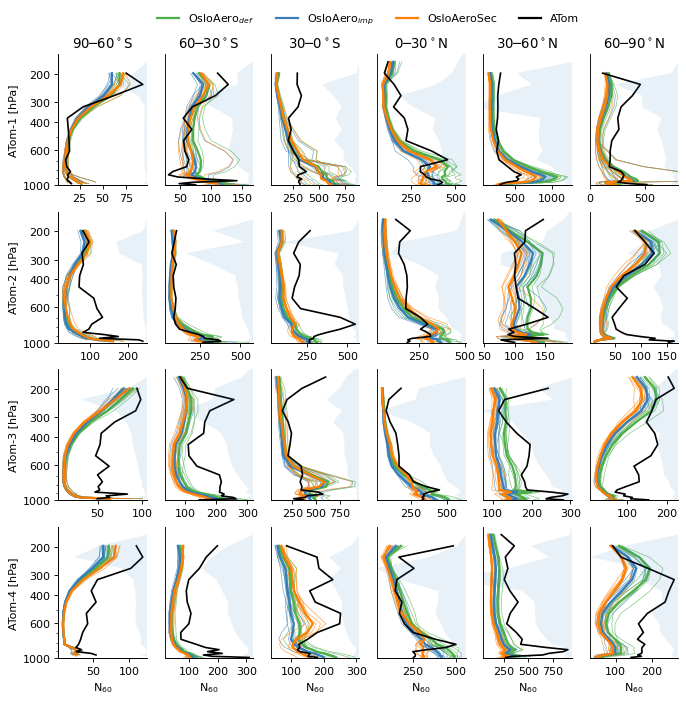

In [46]:
mynorm = LogNorm(vmin=50, vmax=1000)
f, axs_ba = plt.subplots(4,6, figsize=[10,10], sharey=True, dpi=80)
plt_attrs = dict(yscale='log', ylim=[1000,150])#, norm = mynorm, add_colorbar=False,rasterized=True)
for i,at in enumerate(dic_path_atom_dt.keys()):
    _ds_at = dic_ds_atom[at]#.where(lat_mask)
    obs_nu = _ds_at['obs_per_gridbox'].rename(dic_coord)

    axs = axs_ba[i,:]
    
    month = atom2month[at]
    mask = dic_mask[at]
    for i, ax, in enumerate(axs):
        for case in cases_pd:
            _ds = dic_full[case]
            first = False
            for year in np.unique(_ds.time.dt.year):
                if first: 
                    lab=get_nice_name_case(case)
                else:
                    lab='_nolegend_'
                _dss = _ds.sel(time='%.0f-%02.0f'%(year, month))
                lat = _ds['lat']
                lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
                with np.errstate(invalid='ignore'):
                    _ds_mask2 = _dss.where(mask)['N60']
                    ds_mask2 = _ds_mask2.weighted(lat_wg).mean('lon').where(lat_mask).mean('lat')

                    #_ds_mask = _dss.where(mask)['N60'].mean('lon').where(lat_mask).mean('lat')
            
                #_ds_mask.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],alpha=0.7, 
                ds_mask2.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],alpha=0.7, 
                                                             linewidth=.6, **plt_attrs)

                #_dss.where(mask)['N50'].mean(['lon','lat']).plot(y='lev',ax=ax, 
                #                                             label=lab, 
                #                                             c=cdic[col],
                #                                             alpha=0.7, 
                #                                             linewidth=1,
                #                                             **plt_attrs)#, norm = LogNorm(vmin=50, vmax=1000))
            
                first=False
        for case in cases_pd:
            lab=get_nice_name_case(case)
            _ds = dic[case]
            with np.errstate(invalid='ignore'):
                #_ds_mask = _ds.where(mask)['N60'].mean('lon').where(lat_mask).mean('lat').sel(month=month)
                _ds_mask2 = _ds.where(mask)['N60'].sel(month=month)
                ds_mask2 = _ds_mask2.weighted(lat_wg).mean('lon').where(lat_mask).mean('lat')

            #_ds.where(mask)['N60'].mean('lon').sel(month=month).plot(y='lev',ax=ax,**plt_attrs)
            ds_mask2.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],linewidth=2, **plt_attrs)
            #_ds_mask.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],linewidth=2, **plt_attrs)
            
            #_ds = dic[case]
            #lat = _ds['lat']
            #lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
            #with np.errstate(invalid='ignore'):
            #    _ds_mask = _ds.where(mask)['N60'].mean('lon').sel(month=month).where(lat_mask).mean('lat')
            # 
            # _ds_mask.plot(y='lev',ax=ax,label= get_nice_name_case(case),c = cdic[case2modtype[case]], **plt_attrs)
        
        lat = dic_ds_atom[at]['lat_cat']
        lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
        
        with np.errstate(invalid='ignore'):
            
            _ds_at = dic_ds_atom[at].where(lat_mask)
            weigh = lat_wg.rename(dict(lat='lat_cat'))#_ds_at['obs_per_gridbox'].fillna(0)
            ds_plt = _ds_at['N60'].weighted(weigh).mean(['lon_cat','lat_cat'])
            im = ds_plt.plot(y='pres_cat',c='k', ax=ax, **plt_attrs)
            #im = _ds_at['N60'].mean(['lon_cat','lat_cat']).plot(y='pres_cat',c='k', ax=ax, **plt_attrs)
            num = _ds_at['obs_per_gridbox'].sum(['lon_cat','lat_cat'])
            ax2 = ax.twiny()
            ax2.fill_betweenx(num.pres_cat,0*num, num, alpha=0.1, zorder=1)
            ax2.set_xlim([1400,0])
            ax2.set_xticks([])
            sns.despine(f)
            ax2.set_title('')
            ax.set_title('')
            #ax2 = ax.twiny()
        #ax.set_xscale('log')
    #axs[-1].set_title(tit_dic[at])
for ax in axs_ba[:,1:].flatten():
    ax.set_ylabel('')
for ax in axs_ba[0:-1,:].flatten():
    ax.set_xlabel('')
for ax in axs_ba[-1,:].flatten():
    ax.set_xlabel('N$_{60}$')#, font_size=12)
for i, ax in enumerate(axs_ba[0,:]):
    la_f = latitude_bands[i]
    la_to = latitude_bands[i+1]
    if la_f<0:
        ax.set_title(f'{-la_f}$─${-la_to}$^\circ$S')
    else:
        ax.set_title(f'{la_f}$─${la_to}$^\circ$N')

sns.despine(f)
for ax in axs_ba[:,1:].flatten():
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y',which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        #labelbottom=False
                  )
for ax, at in zip(axs_ba[:,0].flatten(),dic_path_atom_dt.keys()):
    ax.set_ylabel(f'{tit_dic[at]} [hPa]')
    ax.set_yticks([1000,600,400,300,200])
    ax.set_yticklabels([1000,600,400,300,200])

    #    ax.set_xlabel('Latitude [$^\circ$ N]')
#f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
#f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
from IPython.display import clear_output
clear_output()

lims = [[0,250],[10,300],[0,800],[0,600],[0,1400], [0,600]]
#for i in range(len(latitude_bands)):
#    for j,ax in enumerate(axs_ba[:,i]):
#        ax.set_xlim(lims[i])
#        
axs_ba[0,-1].set_xlim([0,800])
leg = axs_ba[0,0].legend(custom_lines, [cn_def,cn_imp,cn_sec,'ATom'], 
          ncol=4,
          frameon=False,
          bbox_to_anchor=[1,1.4,0,0], loc='upper left')
#IPython.display.clear_output()
fn = filen_base /'atom_levlat_N60'
f.savefig(fn.with_suffix('.png'), bbox_extra_artists=[leg,])
f.savefig(fn.with_suffix('.pdf'), bbox_extra_artists=[leg,])
plt.show()

In [47]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

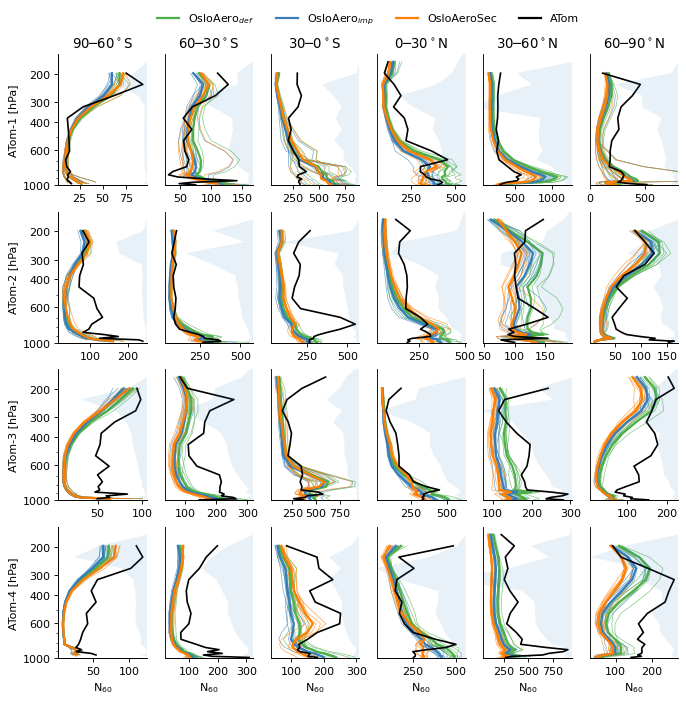

In [48]:
leg = axs_ba[0,0].legend(custom_lines, [cn_def,cn_imp,cn_sec,'ATom'], 
          ncol=4,
          frameon=False,
          bbox_to_anchor=[1,1.4,0,0], loc='upper left')

f.savefig(fn.with_suffix('.png'), bbox_extra_artists=[leg,])
f.savefig(fn.with_suffix('.pdf'), bbox_extra_artists=[leg,])
f

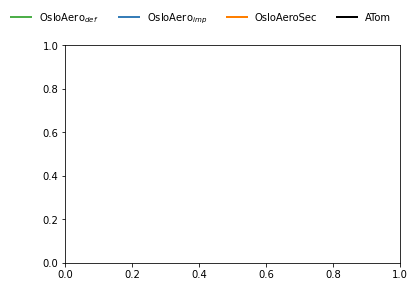

In [49]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color= cdic[cn_def],  lw=2),  #color=cmap(0.),
                Line2D([0], [0], color=cdic[cn_imp], lw=2),  #color=cmap(.5),
                Line2D([0], [0], color = cdic[cn_sec], lw=2),
                Line2D([0], [0], color = 'k', lw=2),
               ]  #color=cmap(1.),

fig, ax2 = plt.subplots()
#lines = ax.plot(data)
ax2.legend(custom_lines, [cn_def,cn_imp,cn_sec,'ATom'], 
          ncol=4,
          frameon=False,
          bbox_to_anchor=[1,1.2])

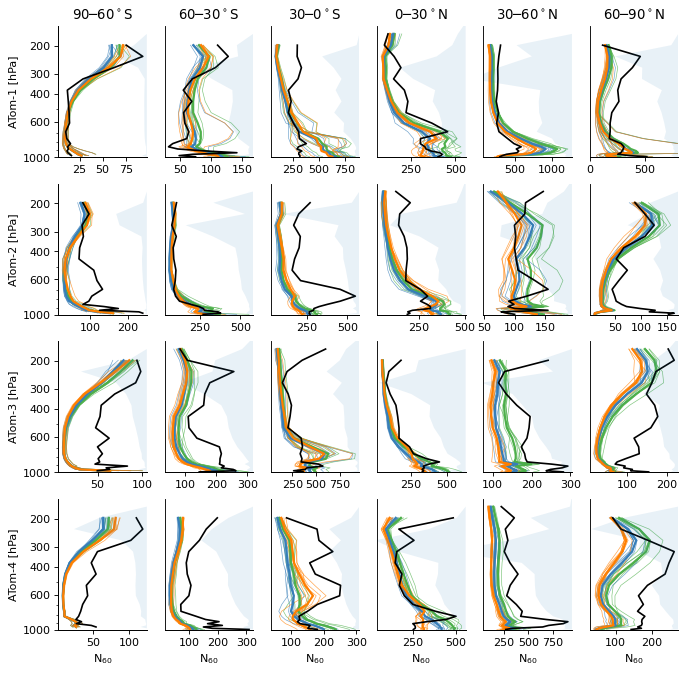

In [50]:
mynorm = LogNorm(vmin=50, vmax=1000)
f, axs_ba = plt.subplots(4,6, figsize=[10,10], sharey=True, dpi=80)
plt_attrs = dict(yscale='log', ylim=[1000,150])#, norm = mynorm, add_colorbar=False,rasterized=True)
for i,at in enumerate(dic_path_atom_dt.keys()):
    _ds_at = dic_ds_atom[at]#.where(lat_mask)
    obs_nu = _ds_at['obs_per_gridbox'].rename(dic_coord)

    axs = axs_ba[i,:]
    
    month = atom2month[at]
    mask = dic_mask[at]
    for i, ax, in enumerate(axs):
        for case in cases_pd:
            _ds = dic_full[case]
            first = False
            for year in np.unique(_ds.time.dt.year):
                if first: 
                    lab=get_nice_name_case(case)
                else:
                    lab='_nolegend_'
                _dss = _ds.sel(time='%.0f-%02.0f'%(year, month))
                lat = _ds['lat']
                lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
                with np.errstate(invalid='ignore'):
                    _ds_mask2 = _dss.where(mask)['N60']
                    ds_mask2 = _ds_mask2.weighted(lat_wg).mean('lon').where(lat_mask).mean('lat')

                    #_ds_mask = _dss.where(mask)['N60'].mean('lon').where(lat_mask).mean('lat')
            
                #_ds_mask.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],alpha=0.7, 
                ds_mask2.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],alpha=0.7, 
                                                             linewidth=.6, **plt_attrs)

                #_dss.where(mask)['N50'].mean(['lon','lat']).plot(y='lev',ax=ax, 
                #                                             label=lab, 
                #                                             c=cdic[col],
                #                                             alpha=0.7, 
                #                                             linewidth=1,
                #                                             **plt_attrs)#, norm = LogNorm(vmin=50, vmax=1000))
            
                first=False
        for case in cases_pd:
            lab=get_nice_name_case(case)
            _ds = dic[case]
            with np.errstate(invalid='ignore'):
                #_ds_mask = _ds.where(mask)['N60'].mean('lon').where(lat_mask).mean('lat').sel(month=month)
                _ds_mask2 = _ds.where(mask)['N60'].sel(month=month)
                ds_mask2 = _ds_mask2.weighted(lat_wg).mean('lon').where(lat_mask).mean('lat')

            #_ds.where(mask)['N60'].mean('lon').sel(month=month).plot(y='lev',ax=ax,**plt_attrs)
            ds_mask2.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],linewidth=2, **plt_attrs)
            #_ds_mask.plot(y='lev',ax=ax,label= lab,c = cdic[case2modtype[case]],linewidth=2, **plt_attrs)
            
            #_ds = dic[case]
            #lat = _ds['lat']
            #lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
            #with np.errstate(invalid='ignore'):
            #    _ds_mask = _ds.where(mask)['N60'].mean('lon').sel(month=month).where(lat_mask).mean('lat')
            # 
            # _ds_mask.plot(y='lev',ax=ax,label= get_nice_name_case(case),c = cdic[case2modtype[case]], **plt_attrs)
        
        lat = dic_ds_atom[at]['lat_cat']
        lat_mask = (lat>latitude_bands[i]) & (lat<=latitude_bands[i+1])
        
        with np.errstate(invalid='ignore'):
            
            _ds_at = dic_ds_atom[at].where(lat_mask)
            weigh = lat_wg.rename(dict(lat='lat_cat'))#_ds_at['obs_per_gridbox'].fillna(0)
            ds_plt = _ds_at['N60'].weighted(weigh).mean(['lon_cat','lat_cat'])
            im = ds_plt.plot(y='pres_cat',c='k', ax=ax, **plt_attrs)
            #im = _ds_at['N60'].mean(['lon_cat','lat_cat']).plot(y='pres_cat',c='k', ax=ax, **plt_attrs)
            num = _ds_at['obs_per_gridbox'].sum(['lon_cat','lat_cat'])
            ax2 = ax.twiny()
            ax2.fill_betweenx(num.pres_cat,0*num, num, alpha=0.1, zorder=1)
            ax2.set_xlim([1400,0])
            ax2.set_xticks([])
            sns.despine(f)
            ax2.set_title('')
            ax.set_title('')
            #ax2 = ax.twiny()
        #ax.set_xscale('log')
    #axs[-1].set_title(tit_dic[at])
for ax in axs_ba[:,1:].flatten():
    ax.set_ylabel('')
for ax in axs_ba[0:-1,:].flatten():
    ax.set_xlabel('')
for ax in axs_ba[-1,:].flatten():
    ax.set_xlabel('N$_{60}$')#, font_size=12)
for i, ax in enumerate(axs_ba[0,:]):
    la_f = latitude_bands[i]
    la_to = latitude_bands[i+1]
    if la_f<0:
        ax.set_title(f'{-la_f}$─${-la_to}$^\circ$S')
    else:
        ax.set_title(f'{la_f}$─${la_to}$^\circ$N')

sns.despine(f)
for ax in axs_ba[:,1:].flatten():
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y',which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        #labelbottom=False
                  )
for ax, at in zip(axs_ba[:,0].flatten(),dic_path_atom_dt.keys()):
    ax.set_ylabel(f'{tit_dic[at]} [hPa]')
    ax.set_yticks([1000,600,400,300,200])
    ax.set_yticklabels([1000,600,400,300,200])

    #    ax.set_xlabel('Latitude [$^\circ$ N]')
#f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
#f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
from IPython.display import clear_output
clear_output()

lims = [[0,250],[10,300],[0,800],[0,600],[0,1400], [0,600]]
#for i in range(len(latitude_bands)):
#    for j,ax in enumerate(axs_ba[:,i]):
#        ax.set_xlim(lims[i])
#        
axs_ba[0,-1].set_xlim([0,800])

#IPython.display.clear_output()
fn = filen_base /'atom_levlat_N60'
f.savefig(fn.with_suffix('.png'))
f.savefig(fn.with_suffix('.pdf'))
plt.show()

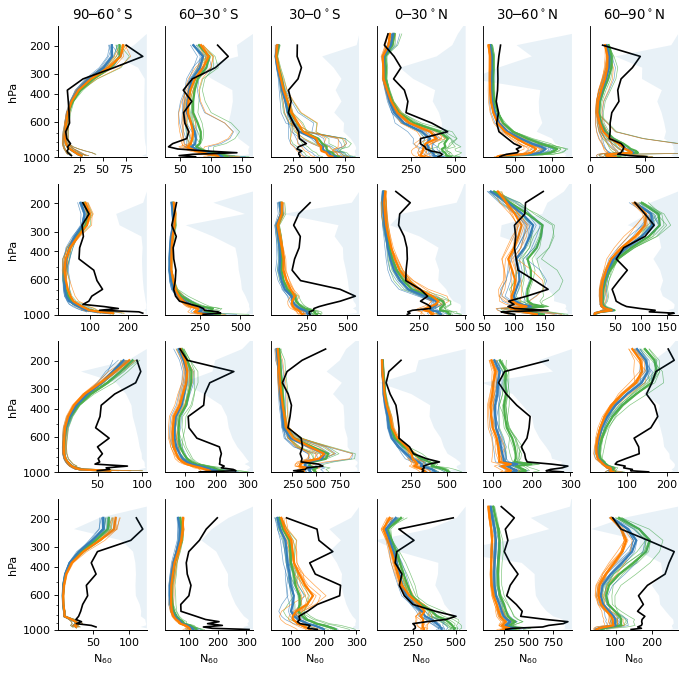

In [51]:
for ax in axs_ba[:,1:].flatten():
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y',which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        #labelbottom=False
                  )
for ax in axs_ba[:,0].flatten():
    ax.set_ylabel('hPa')
    ax.set_yticks([1000,600,400,300,200])
    ax.set_yticklabels([1000,600,400,300,200])

IPython.display.display(f)

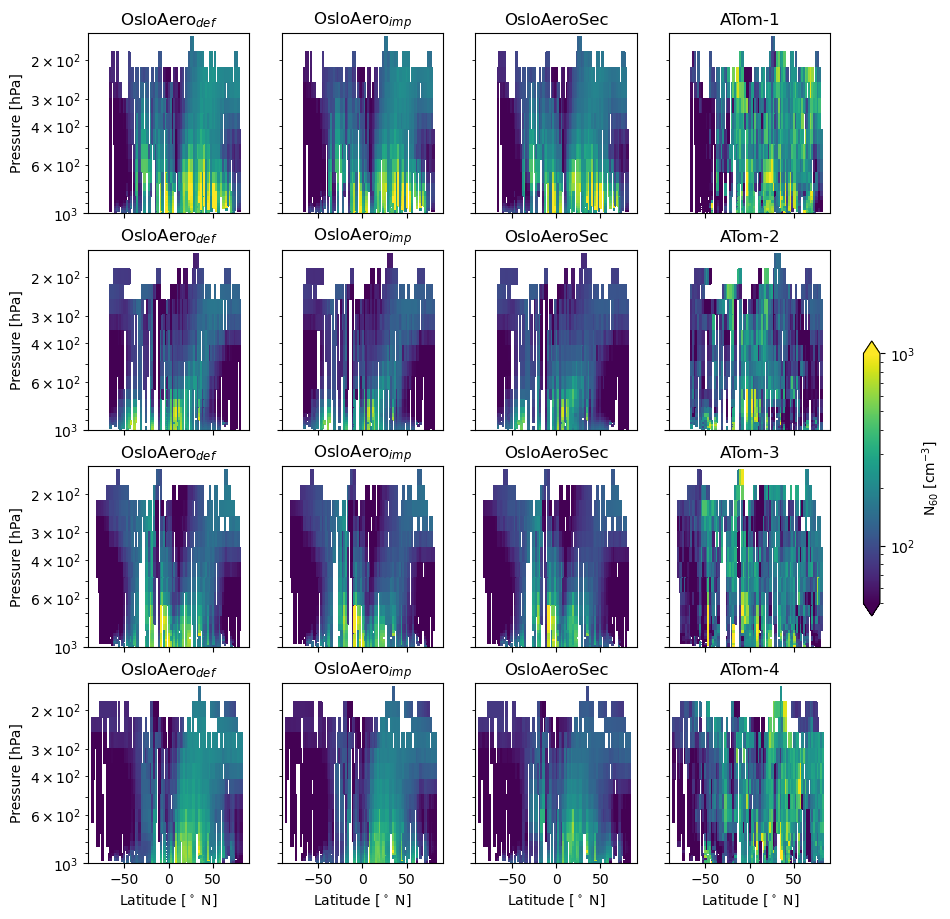

In [52]:
mynorm = LogNorm(vmin=50, vmax=1000)
f, axs_ba = plt.subplots(4,4, figsize=[11,11],sharex=True, sharey=True, dpi=100)
plt_attrs = dict(yscale='log', ylim=[1000,150], norm = mynorm, add_colorbar=False,rasterized=True)
for i,at in enumerate(dic_path_atom_dt.keys()):
    axs = axs_ba[i,:]
    
    month = atom2month[at]
    mask = dic_mask[at]
    for case,ax in zip(cases_pd,axs):
        _ds = dic[case]
        _ds.where(mask)['N60'].mean('lon').sel(month=month).plot(y='lev',ax=ax,**plt_attrs)
        ax.set_title(get_nice_name_case(case))
        
    
    _ds_at = dic_ds_atom[at]
    im = _ds_at['N60'].mean('lon_cat').plot(y='pres_cat', ax=axs[-1], **plt_attrs)
    axs[-1].set_title(tit_dic[at])
for ax in axs_ba[:,1:].flatten():
    ax.set_ylabel('')
for ax in axs_ba[0:-1,:].flatten():
    ax.set_xlabel('')
for ax in axs_ba[-1,:].flatten():
    ax.set_xlabel('Latitude [$^\circ$ N]')
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
clear_output()


fn = filen_base /'atom_levlat_N60'
#f.savefig(fn.with_suffix('.png'))
#f.savefig(fn.with_suffix('.pdf'))
plt.show()

In [53]:
from matplotlib.colors import SymLogNorm, Normalize

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-

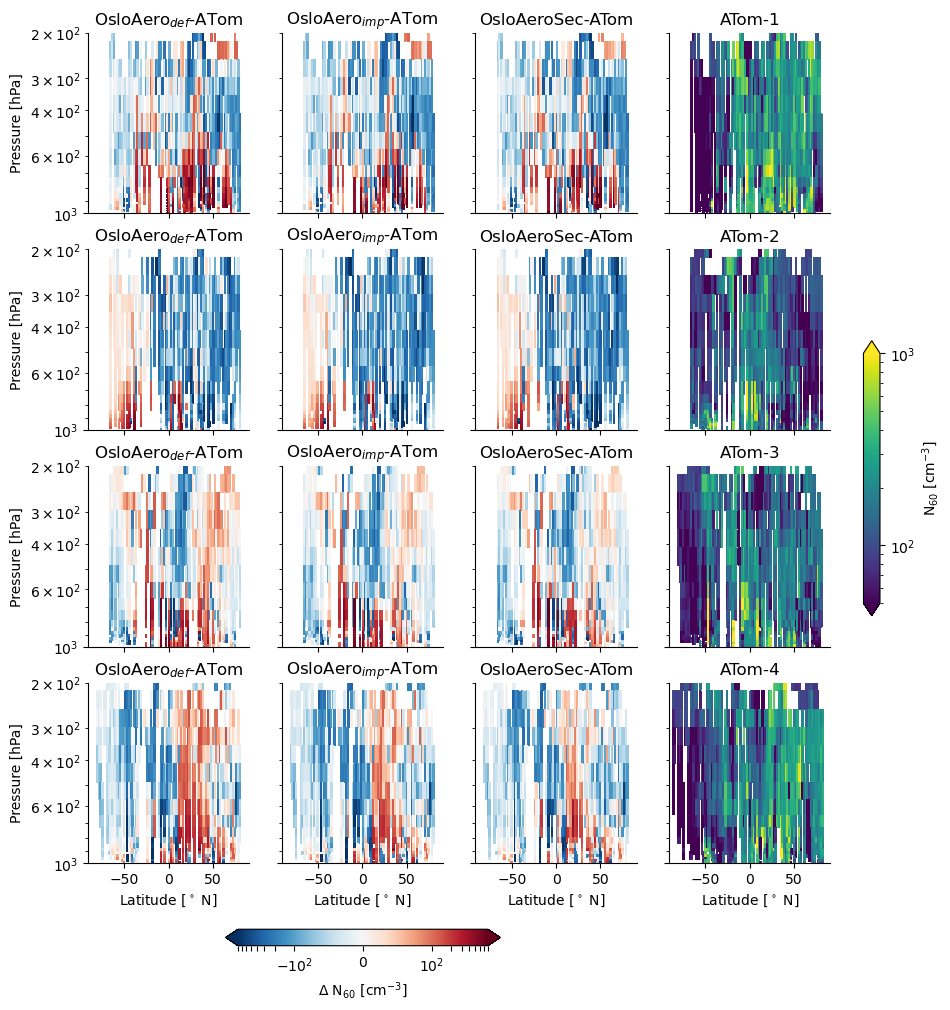

In [54]:
## mynorm = LogNorm(vmin=50, vmax=1000)
f, axs_ba = plt.subplots(4,4, figsize=[11,11],sharex=True, sharey=True, dpi=100)
plt_attrs = dict(yscale='log', ylim=[1000,200], add_colorbar=False,rasterized=True)
norm_diff = SymLogNorm(vmin=-800, vmax=800, linthresh=100,linscale=1, base=10)
for i,at in enumerate(dic_path_atom_dt.keys()):
    axs = axs_ba[i,:]
    
    month = atom2month[at]
    mask = dic_mask[at]
    for case,ax in zip(cases_pd,axs):
        _ds = dic[case]
        da1 = _ds.where(mask)['N60'].mean('lon').sel(month=month)
        da2 = _ds_at['N60'].mean('lon_cat').rename({'pres_cat':'lev', 'lat_cat':'lat'})
        m_ab = np.abs(da1-da2)>0
        im2 = (da1-da2).where(m_ab).plot(y='lev',ax=ax,**plt_attrs, norm = norm_diff, cmap=None)#robust=True)
        ax.set_title(get_nice_name_case(case)+'-ATom')
        
    _ds_at = dic_ds_atom[at]
    im = _ds_at['N60'].mean('lon_cat').plot(y='pres_cat', ax=axs[-1], norm = mynorm, **plt_attrs)
    axs[-1].set_title(tit_dic[at])
for ax in axs_ba[:,1:].flatten():
    ax.set_ylabel('')
for ax in axs_ba[0:-1,:].flatten():
    ax.set_xlabel('')
for ax in axs_ba[-1,:].flatten():
    ax.set_xlabel('Latitude [$^\circ$ N]')
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
cbar_ax2 = f.add_axes([0.25,0.05, 0.25,0.015])
f.colorbar(im2, cax = cbar_ax2, extend='both', label= '$\Delta$ N$_{60}$ [cm$^{-3}$]' , orientation='horizontal' )

sns.despine(f)
fn = filen_base /'atom_levlat_N60_diff'
#f.savefig(fn.with_suffix('.png'))
#f.savefig(fn.with_suffix('.pdf'))
plt.show()

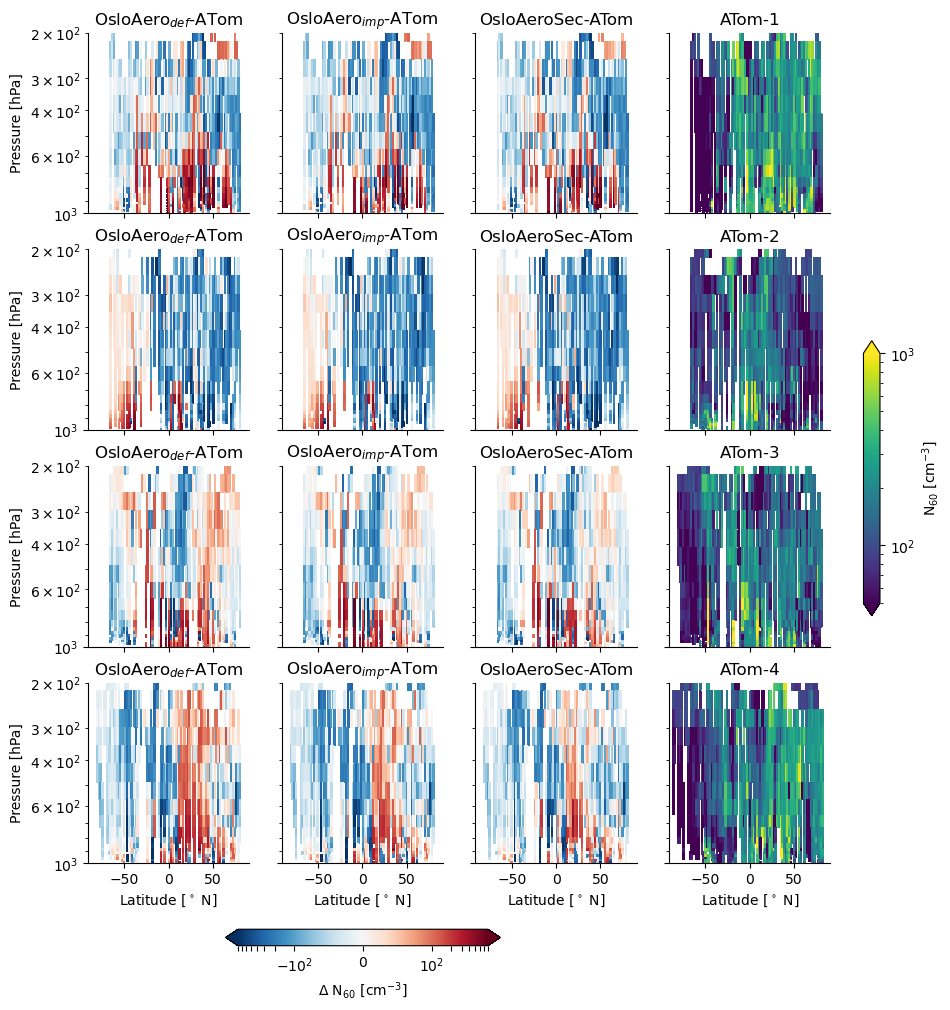

In [55]:
## mynorm = LogNorm(vmin=50, vmax=1000)
f, axs_ba = plt.subplots(4,4, figsize=[11,11],sharex=True, sharey=True, dpi=100)
plt_attrs = dict(yscale='log', ylim=[1000,200], add_colorbar=False,rasterized=True)
norm_diff = SymLogNorm(vmin=-800, vmax=800, linthresh=100,linscale=1, base=10)
for i,at in enumerate(dic_path_atom_dt.keys()):
    axs = axs_ba[i,:]
    
    month = atom2month[at]
    mask = dic_mask[at]
    for case,ax in zip(cases_pd,axs):
        _ds = dic[case]
        da1 = _ds.where(mask)['N60'].mean('lon').sel(month=month)
        da2 = _ds_at['N60'].mean('lon_cat').rename({'pres_cat':'lev', 'lat_cat':'lat'})
        m_ab = np.abs(da1-da2)>0
        im2 = (da1-da2).where(m_ab).plot(y='lev',ax=ax,**plt_attrs, norm = norm_diff, cmap=None)#robust=True)
        ax.set_title(get_nice_name_case(case)+'-ATom')
        
    _ds_at = dic_ds_atom[at]
    im = _ds_at['N60'].mean('lon_cat').plot(y='pres_cat', ax=axs[-1], norm = mynorm, **plt_attrs)
    axs[-1].set_title(tit_dic[at])
for ax in axs_ba[:,1:].flatten():
    ax.set_ylabel('')
for ax in axs_ba[0:-1,:].flatten():
    ax.set_xlabel('')
for ax in axs_ba[-1,:].flatten():
    ax.set_xlabel('Latitude [$^\circ$ N]')
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
cbar_ax2 = f.add_axes([0.25,0.05, 0.25,0.015])
f.colorbar(im2, cax = cbar_ax2, extend='both', label= '$\Delta$ N$_{60}$ [cm$^{-3}$]' , orientation='horizontal' )
clear_output()

sns.despine(f)
fn = filen_base /'atom_levlat_N60_diff'
#f.savefig(fn.with_suffix('.png'))
#f.savefig(fn.with_suffix('.pdf'))
plt.show()

In [56]:
_dss['lat_wg']

<xarray.DataArray 'lat_wg' (time: 1, lat: 96)>
dask.array<getitem, shape=(1, 96), dtype=float64, chunksize=(1, 96), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * time     (time) datetime64[ns] 2014-05-17
Attributes:
    long_name:        latitude weights
    pressure_coords:  True
    raw_data_path:    /projects/NS9066K/sarambl/model_output/archive/
    model:            NorESM
    model_name:       NorESM
    case_name:        SECTv21_ctrl_koagD
    case:             SECTv21_ctrl_koagD
    case_name_nice:   OsloAeroSec
    isSectional:      False
    from_time:        2008-01
    to_time:          2014-12
    startyear:        2008
    endyear:          2014

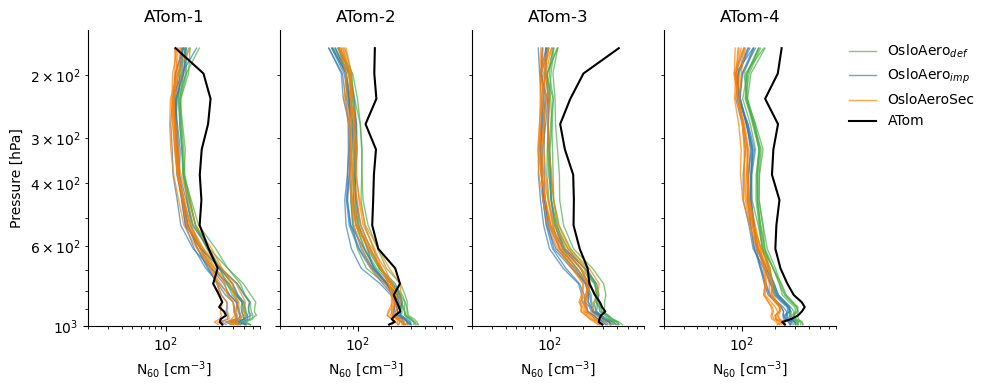

In [57]:
f, axs = plt.subplots(1,4, figsize=[10,4], sharey=True, sharex=True, dpi=100)
plt_attrs = dict(yscale='log', ylim=[1000,150], )
for i,at in enumerate(dic_path_atom_dt.keys()):
    ax = axs[i]
    
    month = atom2month[at]
    mask = dic_mask[at]
    _ds_at = dic_ds_atom[at]

    for case,col in zip(cases_pd,cdic.keys()):
        _ds = dic_full[case]
        first = True
        for year in np.unique(_ds.time.dt.year):
            if first: 
                lab=get_nice_name_case(case)
            else:
                lab='_nolegend_'
            _dss = _ds.sel(time='%.0f-%02.0f'%(year, month)).where(mask)
            _ds_plt=_dss['N60'].weighted(lat_wg).mean(['lon','lat'])
            _ds_plt.plot(y='lev',ax=ax, 
                                                             label=lab, 
                                                             c=cdic[col],
                                                             alpha=0.7, 
                                                             linewidth=1,
                                                             **plt_attrs)#, norm = LogNorm(vmin=50, vmax=1000))
            
            first=False
    lat_wg_at = lat_wg.rename(dict(lat='lat_cat')).fillna(0)
    im = _ds_at['N60'].weighted(lat_wg_at).mean(['lon_cat','lat_cat']).plot(y='pres_cat', ax=ax, c='k', **plt_attrs, label='ATom')

    ax.set_title(tit_dic[at])

    ax.set_xlim([20,700])
    ax.set_xscale('log')

leg = ax.legend(frameon=False, bbox_to_anchor=[1,1])
    #axs[-1].set_title(tit_dic[at])
for ax in axs.flatten():
    ax.set_xlabel('N$_{60}$ [cm$^{-3}$]')
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[1:]:
    ax.set_ylabel('')
#for ax in axs_ba[0:-1,:].flatten():
#    ax.set_xlabel('')
#for ax in axs_ba[-1,:].flatten():
#    ax.set_xlabel('Latitude [$^\circ$ N]')
#f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
#f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
f.tight_layout()
sns.despine(f)
clear_output()

fn = filen_base /'atom_lev_N60'
f.savefig(fn.with_suffix('.png'), bbox_extra_artists = (leg,))
f.savefig(fn.with_suffix('.pdf'), bbox_extra_artists = (leg,))

plt.show()

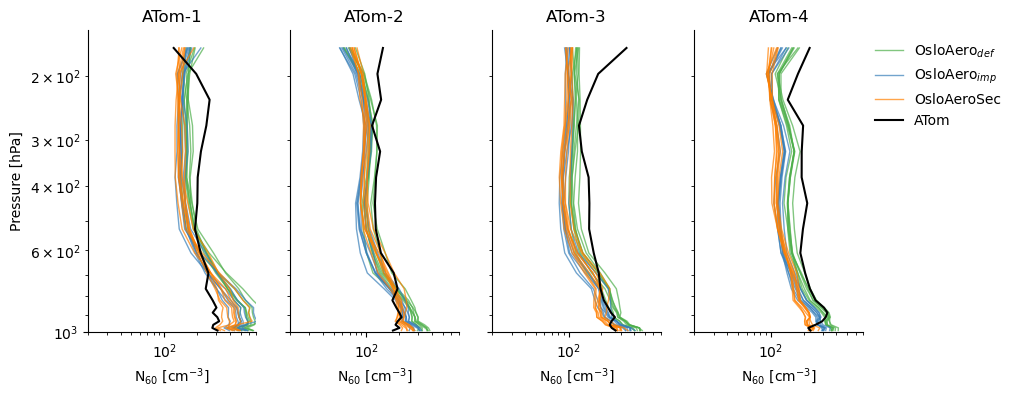

In [58]:
f, axs = plt.subplots(1,4, figsize=[10,4], sharey=True, sharex=True, dpi=100)
plt_attrs = dict(yscale='log', ylim=[1000,150], )
for i,at in enumerate(dic_path_atom_dt.keys()):
    ax = axs[i]
    
    month = atom2month[at]
    mask = dic_mask[at]
    _ds_at = dic_ds_atom[at]

    for case,col in zip(cases_pd,cdic.keys()):
        _ds = dic_full[case]
        first = True
        for year in np.unique(_ds.time.dt.year):
            if first: 
                lab=get_nice_name_case(case)
            else:
                lab='_nolegend_'
            _dss = _ds.sel(time='%.0f-%02.0f'%(year, month))
            _dss.where(mask)['N50'].mean(['lon','lat']).plot(y='lev',ax=ax, 
                                                             label=lab, 
                                                             c=cdic[col],
                                                             alpha=0.7, 
                                                             linewidth=1,
                                                             **plt_attrs)#, norm = LogNorm(vmin=50, vmax=1000))
            
            first=False
    im = _ds_at[nacc].mean(['lon_cat','lat_cat']).plot(y='pres_cat', ax=ax, c='k', **plt_attrs, label='ATom')

    ax.set_title(tit_dic[at])

    ax.set_xlim([20,700])
    ax.set_xscale('log')

ax.legend(frameon=False, bbox_to_anchor=[1,1])
    #axs[-1].set_title(tit_dic[at])
for ax in axs.flatten():
    ax.set_xlabel('N$_{60}$ [cm$^{-3}$]')
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[1:]:
    ax.set_ylabel('')
#for ax in axs_ba[0:-1,:].flatten():
#    ax.set_xlabel('')
#for ax in axs_ba[-1,:].flatten():
#    ax.set_xlabel('Latitude [$^\circ$ N]')
#f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.83, 0.35, 0.015, 0.25])
#f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'N$_{60}$ [cm$^{-3}$]' )
  
clear_output()

sns.despine(f)
fn = filen_base /'atom_lev_N50'
f.savefig(fn.with_suffix('.png'))
f.savefig(fn.with_suffix('.pdf'))

plt.show()